In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [167]:
dataset_path = './data/check.csv'
df = pd.read_csv(dataset_path)

df.head(5)

,popular_size,mutation_rates,distances
0,10,0.001,7178.488195
1,10,0.002,7476.757965
2,10,0.005,7758.680434
3,10,0.006,7360.774078
4,10,0.007,7384.437897


In [168]:
df.shape

(782, 3)

In [169]:
df.dtypes

popular_size        int64
mutation_rates    float64
distances         float64
dtype: object

In [170]:
# Number of unique values of each variable
df.nunique()

popular_size       34
mutation_rates     23
distances         157
dtype: int64

In [171]:
# Number of empty values of each variable
df.isna().sum()

popular_size      0
mutation_rates    0
distances         0
dtype: int64

In [286]:
# Data decription
describe = df.describe()
describe

,popular_size,mutation_rates,distances
count,782.000000,782.000000,782.000000
mean,241.617647,0.333957,7091.045373
std,150.030849,0.287419,156.985153
min,10.000000,0.001000,7010.507491
25%,100.000000,0.010000,7010.507491
50%,260.000000,0.300000,7020.856268
75%,370.000000,0.600000,7088.177812
max,500.000000,0.850000,8109.566477


In [173]:
df.skew()

popular_size     -0.094737
mutation_rates    0.309453
distances         2.902773
dtype: float64

### Exception Handling

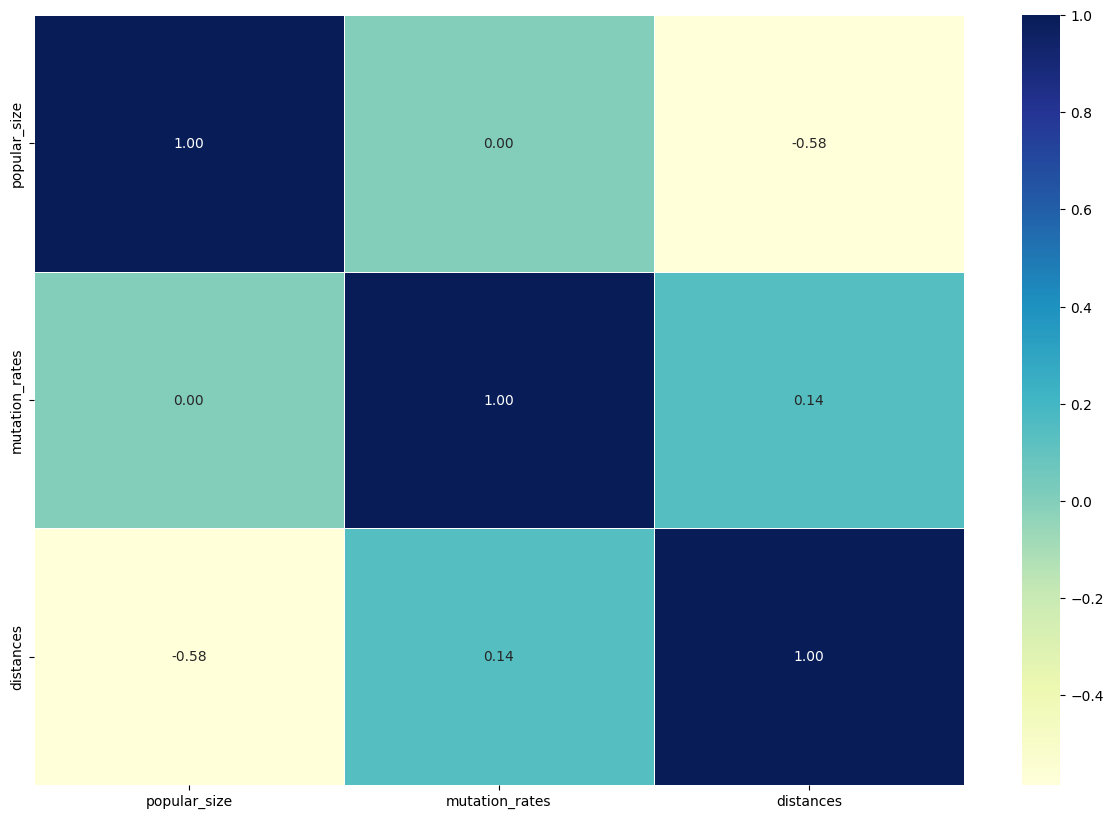

In [174]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),
                  annot=True, 
                  linewidths=0.5, 
                  fmt='.2f', 
                  cmap='YlGnBu')

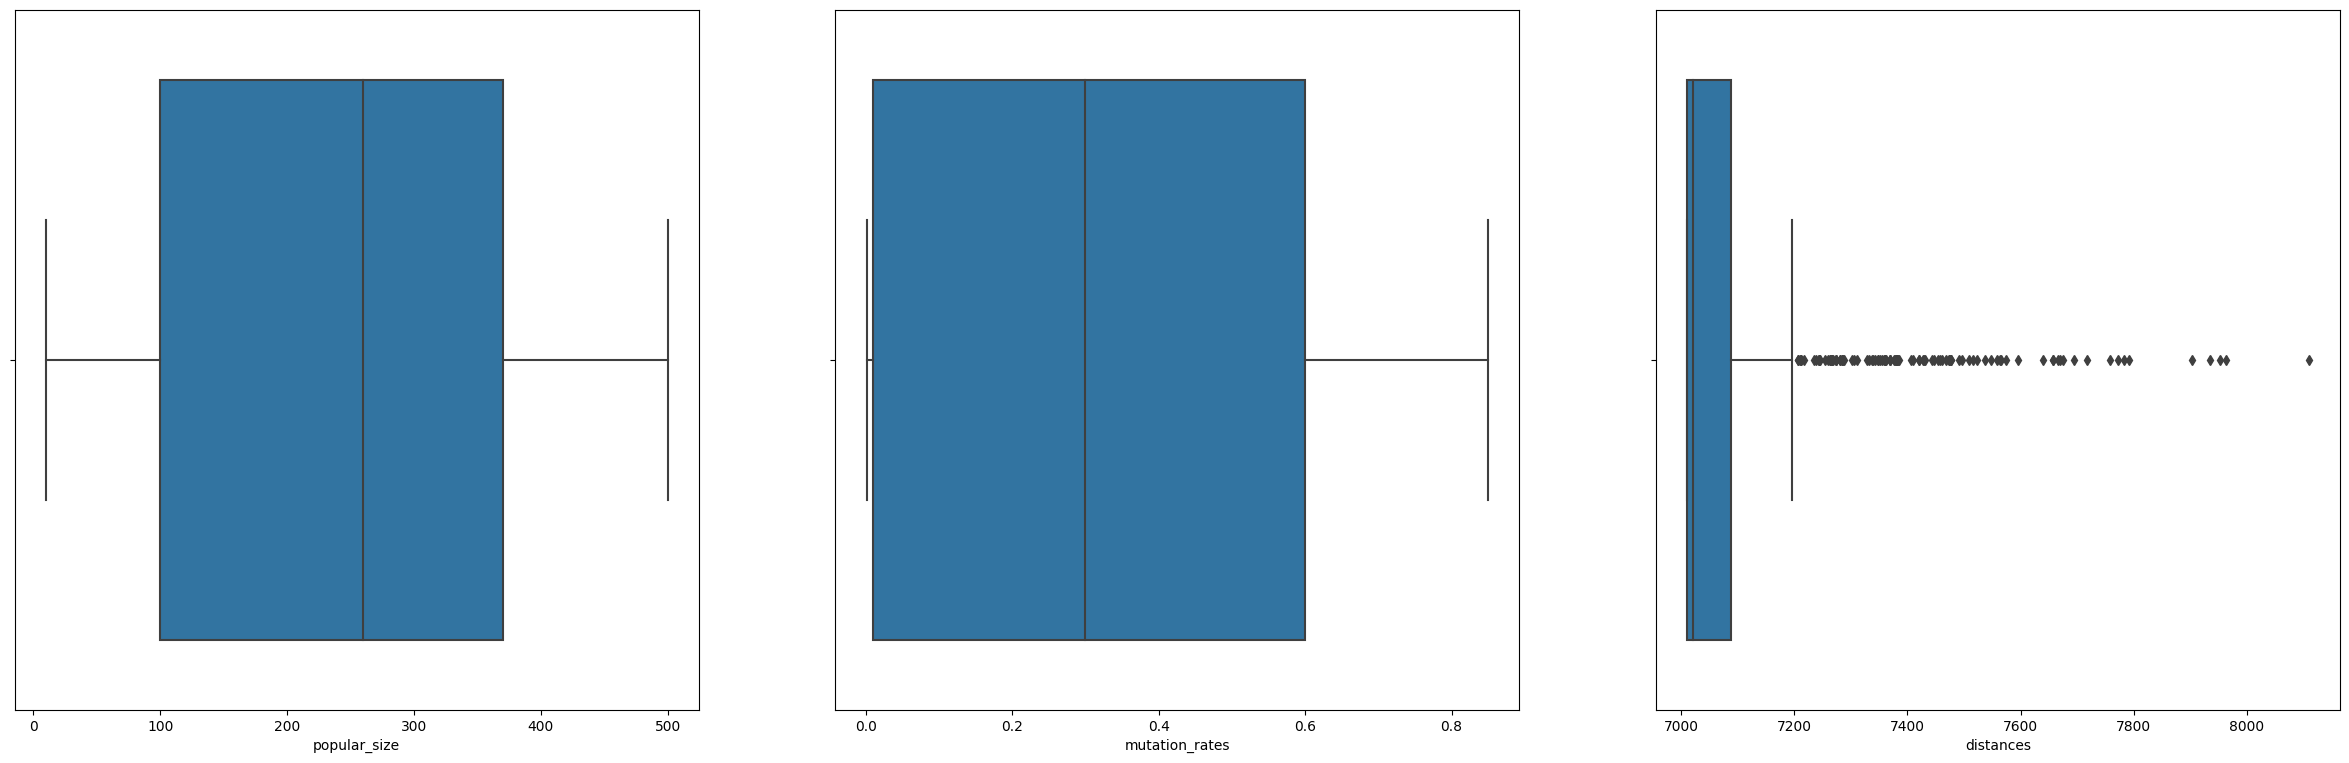

In [177]:
# vẽ đồ thị hộp để quan sát ngoại lệ
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
ax = sns.boxplot(x=df["popular_size"])
plt.subplot(2,3,2)
ax = sns.boxplot(x=df["mutation_rates"])
plt.subplot(2,3,3)
ax = sns.boxplot(x=df["distances"])

In [178]:
skew = df.skew()
skew

popular_size     -0.094737
mutation_rates    0.309453
distances         2.902773
dtype: float64

In [179]:
# Handle Oulier
def outlier_handle(data, column):

  # Phân bố chuẩn:
  if skew[column] >= -1 or skew[column] <= 1:
    lower_bound_value = data[column].mean() - 3 * data[column].std()
    upper_bound_value = data[column].mean() + 3 * data[column].std()
    data.loc[data[column] >= int(upper_bound_value), column] = int(upper_bound_value)
    data.loc[data[column] <= int(lower_bound_value), column] = int(lower_bound_value)

  else:
  # Phân bố lệch
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_bound_value = data[column].quantile(0.25)-(IQR*3)
    upper_bound_value = data[column].quantile(0.75)+(IQR*3)
    data.loc[data[column] >= int(upper_bound_value), column] = int(upper_bound_value)
    data.loc[data[column] <= int(lower_bound_value), column] = int(lower_bound_value)

In [180]:
df_non_outliers = df.copy()
for column in df_non_outliers.columns.values:
  outlier_handle(df_non_outliers, column)  
df_non_outliers.head(5)

,popular_size,mutation_rates,distances
0,10,0.001,7178.488195
1,10,0.002,7476.757965
2,10,0.005,7562.000000
3,10,0.006,7360.774078
4,10,0.007,7384.437897


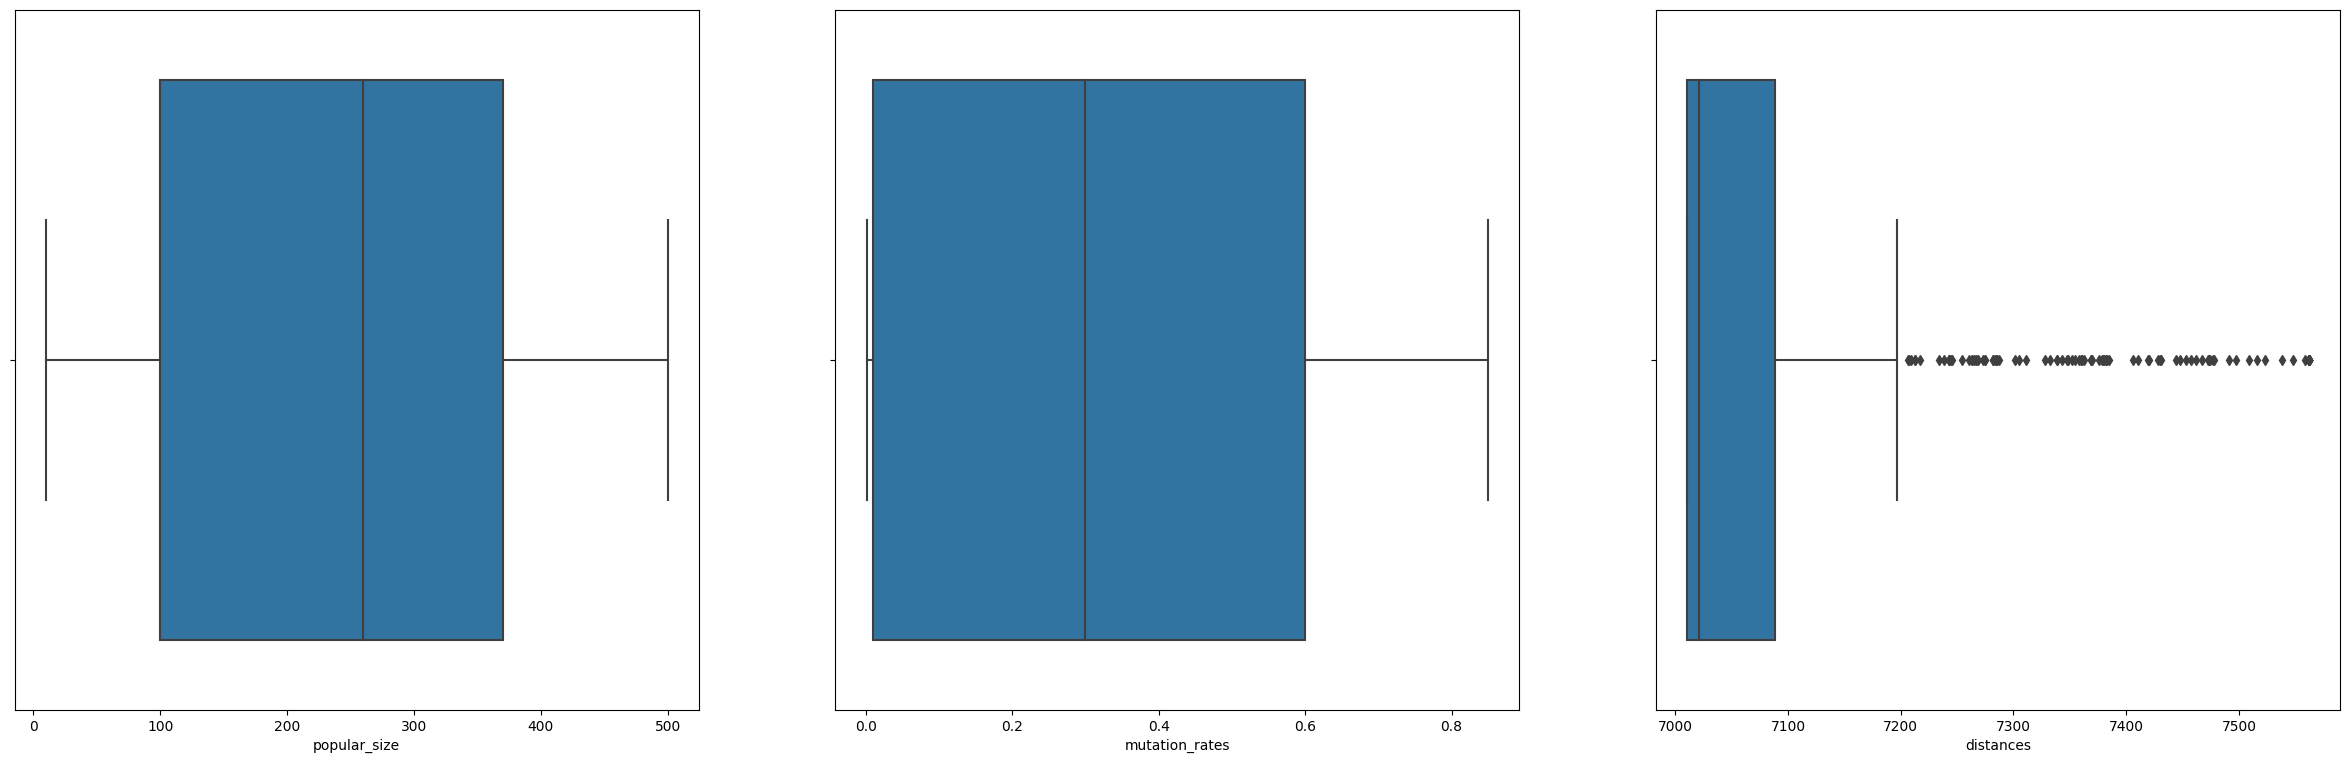

In [181]:
# vẽ đồ thị hộp để quan sát ngoại lệ
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
ax = sns.boxplot(x=df_non_outliers["popular_size"])
plt.subplot(2,3,2)
ax = sns.boxplot(x=df_non_outliers["mutation_rates"])
plt.subplot(2,3,3)
ax = sns.boxplot(x=df_non_outliers["distances"])

### Data Normalization

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [183]:
def calculate_fitness(distance):
    fitness = 1/ (math.pow(distance,1)+1)

    return fitness

In [184]:
def nomalize_fitness(fitnesses):
    sumFitnesses = sum(fitnesses)

    for i in range(0, len(fitnesses)):
        fitnesses[i] = fitnesses[i]/sumFitnesses
    return fitnesses

In [185]:
fitnesses = []
for i in df['distances']:
    fitnesses.append(calculate_fitness(i))

In [186]:
fitnesses = nomalize_fitness(fitnesses)

In [188]:
df_non_outliers['fitness'] = fitnesses
df_non_outliers.head(5)

,popular_size,mutation_rates,distances,fitness
0,10,0.001,7178.488195,0.001263
1,10,0.002,7476.757965,0.001212
2,10,0.005,7562.000000,0.001168
3,10,0.006,7360.774078,0.001231
4,10,0.007,7384.437897,0.001227


##### Min-Max Normalization

In [189]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [194]:
df_clean_minmax = pd.DataFrame(min_max.fit_transform(df_non_outliers), columns=df_non_outliers.columns)
df_clean_minmax.head(5)

,popular_size,mutation_rates,distances,fitness
0,0.0,0.000000,0.304593,0.827338
1,0.0,0.001178,0.845434,0.539873
2,0.0,0.004711,1.000000,0.288478
3,0.0,0.005889,0.635125,0.648887
4,0.0,0.007067,0.678034,0.626367


##### Robust Normalization

In [198]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()

In [199]:
df_clean_robust = pd.DataFrame(robust.fit_transform(df_non_outliers), columns=df_non_outliers.columns)
df_clean_robust.head()

,popular_size,mutation_rates,distances,fitness
0,-0.925926,-0.506780,2.029500,-2.001018
1,-0.925926,-0.505085,5.869703,-5.556484
2,-0.925926,-0.500000,6.967188,-8.665812
3,-0.925926,-0.498305,4.376418,-4.208154
4,-0.925926,-0.496610,4.681088,-4.486689


#### Data Modeling

In [62]:
def model_eval(model, dataX, datay):
  '''
  Tham số:
    model: mô hình hồi quy
    dataX: dữ liệu đặc trưng
    datay: dữ liệu dự đoán
  Trả về:
  //
    Score: Hệ số xác định
    mse  : Sai số toàn phương trung bình
    mae  : Sai số tuyệt đối trung bình
    re   : Hệ số R2
  '''
  x_train, x_test, y_train, y_test = train_test_split(dataX, datay, test_size=0.3, random_state=42)
  model = model.fit(x_train, y_train)
  #trả về giá trị R2
  score= model.score(x_train, y_train)


  y_pred = model.predict(x_test)
  #trung bình bình phương sai số
  mse = mean_squared_error(y_test, y_pred)
  #trung bình sai số tuyệt đối
  mae = mean_absolute_error(y_test, y_pred)
  #tỷ lệ giải thích của mô hình
  r2 = r2_score(y_test, y_pred)

  print("Hệ số xác định:                ", score)
  print("Sai số toàn phương trung bình: ", mse)
  print("Sai số tuyệt đối trung bình:   ", mae)
  print("Hệ số R2:                      ", r2)
  return score, mse, mae, r2

In [248]:
def model_select(model, dataX, datay):
  '''
  Tham số:
    model: mô hình hồi quy
    dataX: dữ liệu đặc trưng
    datay: dữ liệu dự đoán
  Trả về:
    cv_results
    đồ thị 
  '''
  x_train, x_test, y_train, y_test = train_test_split(dataX, datay, test_size=0.3, random_state=42)
  
  # tạo cross-validation scheme
  folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

  # tạo phạm vi điều chỉnh số lượng feature
  hyper_params = [{'n_features_to_select': list(range(1, 8))}]


  # grid search
  # chỉ định model
  lm = model
  lm.fit(x_train, y_train)
  # ước tính trọng số các đặc trưng đối với model 
  rfe = RFE(lm)             

  # gọi GridSearchCV()
  model_cv = GridSearchCV(estimator = rfe, 
                          param_grid = hyper_params, 
                          scoring= 'r2', 
                          cv = folds, 
                          verbose = 1,
                          return_train_score=True)      

  model_cv.fit(x_train, y_train) 
  
  cv_results = pd.DataFrame(model_cv.cv_results_)

  plt.figure(figsize=(16,6))
  plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
  plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
  plt.xlabel('Số feature')
  plt.ylabel('Hệ số R2')
  plt.title("Số features tối ưu")
  plt.legend(['test score', 'train score'], loc='upper left')
  
  return cv_results

In [64]:
# lưu các đánh giá để hiển thị
eval_summary = np.zeros((4, 4))

##### Linear Regression

In [245]:
# Min-max Nomalization
data1 = df_clean_minmax.copy()
X1 = data1.drop(['fitness', 'mutation_rates'], axis=1)
y1 = data1['mutation_rates']

In [246]:
# Robust Nomalization
data2 = df_clean_robust.copy()
X2 = data2.drop(['fitness', 'mutation_rates'], axis=1)
y2 = data2['mutation_rates']

Hệ số xác định:                 0.04056846949085424
Sai số toàn phương trung bình:  0.10483449619500475
Sai số tuyệt đối trung bình:    0.2859800710403848
Hệ số R2:                       0.01572924348213156
Fitting 5 folds for each of 7 candidates, totalling 35 fits


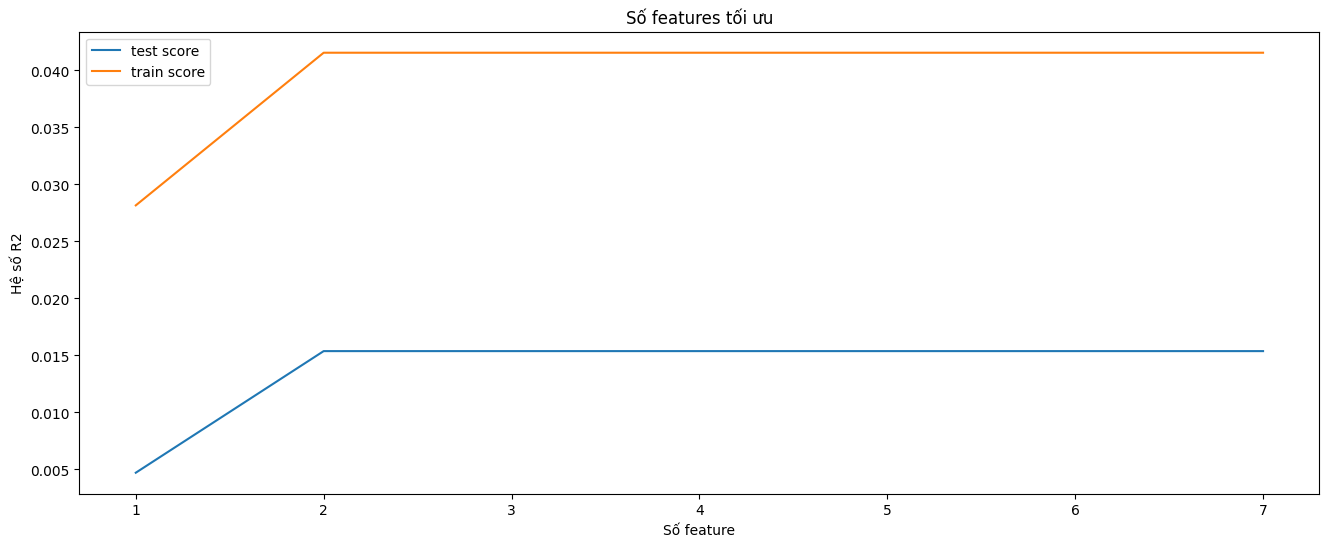

In [249]:
score1_lg, mse1_lg, mae1_lg, r21_lg = model_eval(LinearRegression(), X1, y1)
model_select(LinearRegression(), X1, y1)
eval_summary[0][0] = score1_lg
eval_summary[0][1] = mse1_lg
eval_summary[0][2] = mae1_lg
eval_summary[0][3] = r21_lg

Hệ số xác định:                 0.04056846949085435
Sai số toàn phương trung bình:  0.21707787903434536
Sai số tuyệt đối trung bình:    0.41152047510726564
Hệ số R2:                       0.01572924348213134
Fitting 5 folds for each of 7 candidates, totalling 35 fits


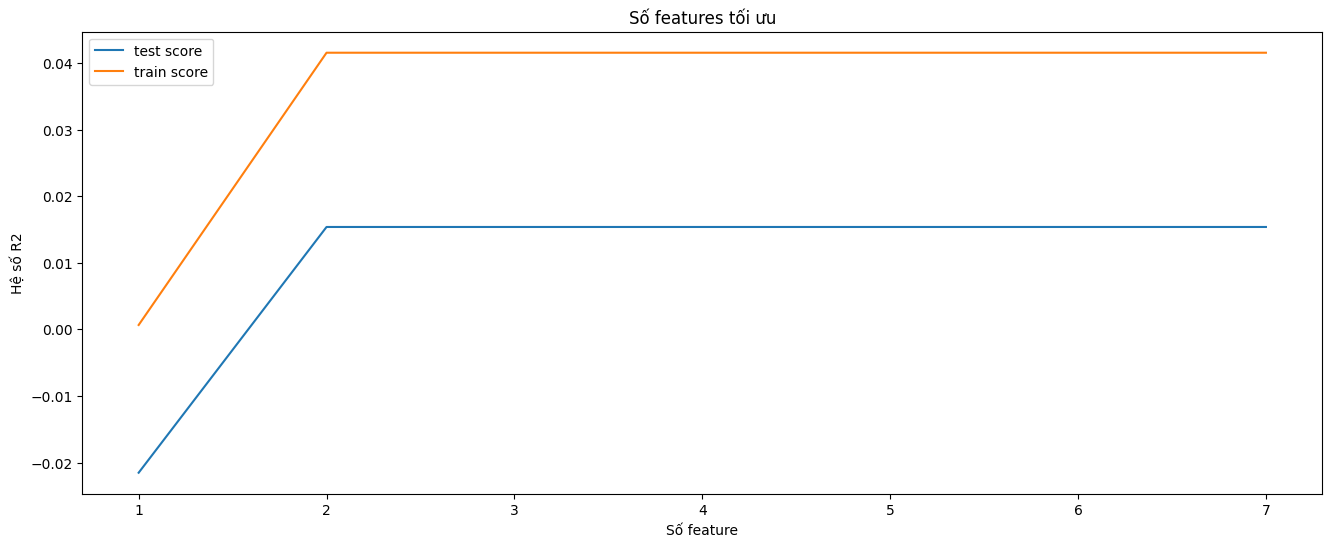

In [250]:
score2_lg, mse2_lg, mae2_lg, r22_lg = model_eval(LinearRegression(), X2, y2)
model_select(LinearRegression(), X2, y2)
eval_summary[1][0] = score2_lg
eval_summary[1][1] = mse2_lg
eval_summary[1][2] = mae2_lg
eval_summary[1][3] = r22_lg

##### Random Forest

Hệ số xác định:                 0.46998076671829525
Sai số toàn phương trung bình:  0.13248921130698274
Sai số tuyệt đối trung bình:    0.30189803248969943
Hệ số R2:                       -0.2439155142312146
Fitting 5 folds for each of 7 candidates, totalling 35 fits


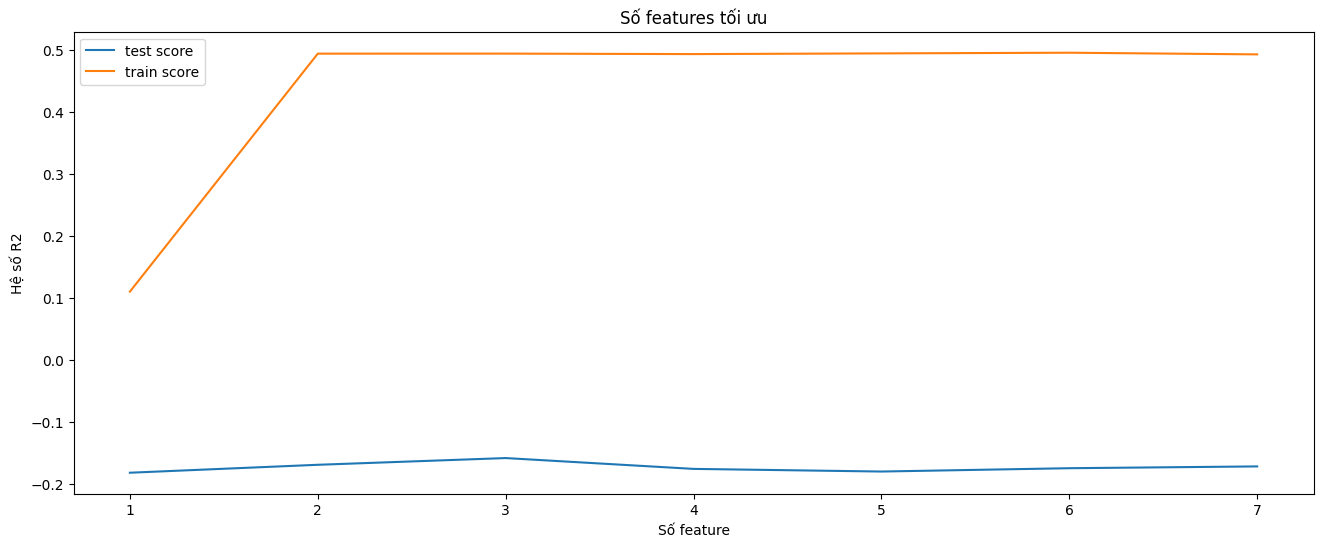

In [251]:
score3_lg, mse3_lg, mae3_lg, r23_lg = model_eval(RandomForestRegressor(), X1, y1)
model_select(RandomForestRegressor(), X1, y1)
eval_summary[2][0] = score3_lg
eval_summary[2][1] = mse3_lg
eval_summary[2][2] = mae3_lg
eval_summary[2][3] = r23_lg

Hệ số xác định:                 0.04056846949085435
Sai số toàn phương trung bình:  0.21707787903434536
Sai số tuyệt đối trung bình:    0.41152047510726564
Hệ số R2:                       0.01572924348213134
Fitting 5 folds for each of 7 candidates, totalling 35 fits


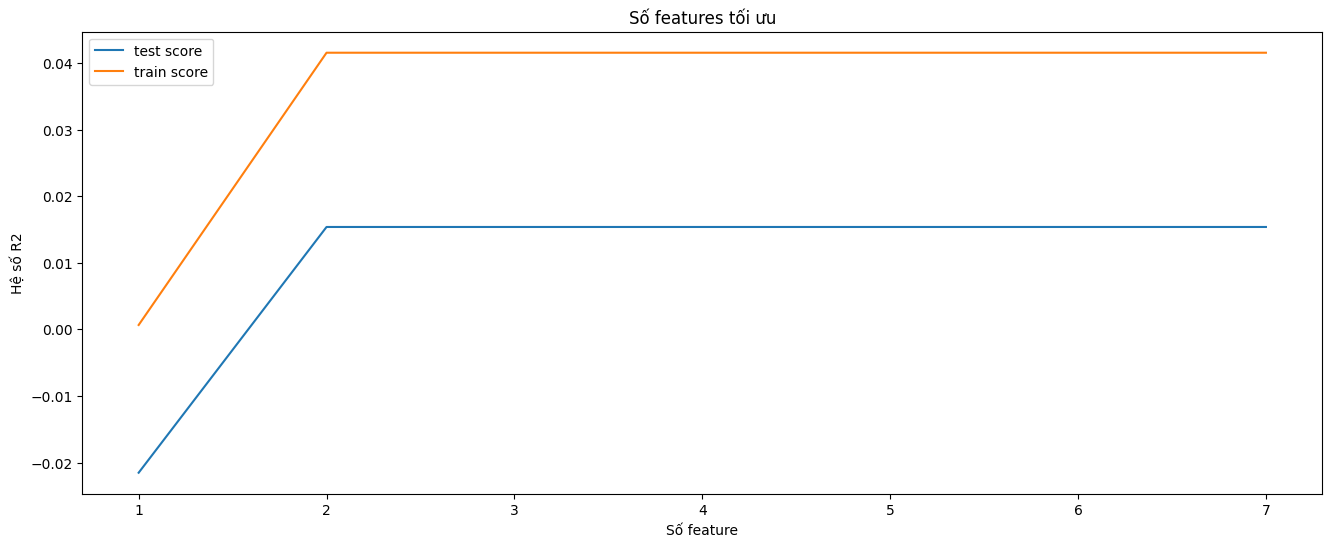

In [252]:
score4_lg, mse4_lg, mae4_lg, r24_lg = model_eval(LinearRegression(), X2, y2)
model_select(LinearRegression(), X2, y2)
eval_summary[3][0] = score4_lg
eval_summary[3][1] = mse4_lg
eval_summary[3][2] = mae4_lg
eval_summary[3][3] = r24_lg

#### Compare Results

In [253]:
result = pd.DataFrame(eval_summary, index=['data1 linear regression', 'data2 linear regression',
                                           'data1 random forest', 'data2 random forest'],
                    columns=['score','mse','mae', 'r2'])
result

,score,mse,mae,r2
data1 linear regression,0.040568,0.104834,0.285980,0.015729
data2 linear regression,0.040568,0.217078,0.411520,0.015729
data1 random forest,0.469981,0.132489,0.301898,-0.243916
data2 random forest,0.040568,0.217078,0.411520,0.015729


In [260]:
# Tạo tham số grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500]
}
# tạo model
model = RandomForestRegressor()
# Khỏi tạo grid search
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.7, random_state=42)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV]

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 200}

In [255]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=100, max_features=2, min_samples_leaf=5,
                      min_samples_split=8)

In [299]:
from sklearn.metrics import accuracy_score


X_pred = min_max.fit_transform([[0.4, 7195.07421796629]])
y_pred = best_grid.predict(X_pred)
y_pred[0]


/home/gracie/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.3671477980888447

In [294]:
min = describe['popular_size']['min']
max = describe['popular_size']['max']
X = y_pred[0] * (max - min) + min
int(X)

189